In [ ]:
%load_ext autoreload
%autoreload 2

In [117]:
from __init__ import *
from new_solutions.simple_problem import study_many_problems
from runner.svg2plan import run_new_layout
from new_solutions.selection import *
from itertools import accumulate
from operator import add 
from functools import reduce
from visuals.plotter import plot_general
# from unit_tests.test_solutions import *
from typing import Literal, List
from enum import Enum
from collections import Counter
from typing import TypeVar
from typing import Any
from domains.domain import Domain

import plotly.io as pio
pio.renderers.default = "browser"

from fixes.problem_types.side_hole_id2 import *
import pickle

In [175]:
report = run_new_layout()
c = Cook(report)
plot_general(c.history[0], "starting doma")


executer> 
 begining to execute stacking
problem being studied: -> Problem(index=2, problem_type=ProblemType.HOLE, resolved=False, nbs=['transit_space', 'laundry', 'm_bath', 'bath']
first bl to try -> node: bath, action: PULL, summary: Counter({'OVERLAP': 3}), # unres probs: 3
next best layout node: bath, action: PULL, summary: Counter({'OVERLAP': 3}), # unres probs: 3
1


[Problem(index=1, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_bedroom', 'dining'),
 Problem(index=2, problem_type=ProblemType.HOLE, resolved=True, nbs=['transit_space', 'laundry', 'm_bath', 'bath'],
 Problem(index=3, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_closet', 'dining'),
 Problem(index=4, problem_type=ProblemType.OVERLAP, resolved=True, nbs=('m_bedroom', 'bath'),
 Problem(index=5, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('bath', 'transit_space')]

In [173]:
c.plot(c.count)
c.bl_hist[0].problems

[Problem(index=1, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_bedroom', 'dining'),
 Problem(index=2, problem_type=ProblemType.HOLE, resolved=True, nbs=['transit_space', 'laundry', 'm_bath', 'bath'],
 Problem(index=3, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_closet', 'dining'),
 Problem(index=4, problem_type=ProblemType.OVERLAP, resolved=True, nbs=('m_bedroom', 'bath'),
 Problem(index=5, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('bath', 'transit_space')]

In [176]:
c.run_again()
c.plot(c.count)

problem being studied: -> Problem(index=5, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('bath', 'transit_space')
first bl to try -> node: bath, action: SQUEEZE, summary: Counter({'OVERLAP': 2, 'HOLE': 1}), # unres probs: 3
next best layout node: bath, action: SQUEEZE, summary: Counter({'OVERLAP': 2, 'HOLE': 1}), # unres probs: 3
running again -> 2


In [177]:
c.run_again()
c.plot(c.count)

problem being studied: -> Problem(index=4, problem_type=ProblemType.HOLE, resolved=False, nbs=['transit_space', 'laundry', 'm_bath', 'bath']
first bl to try -> node: bath, action: STRETCH, summary: Counter({'OVERLAP': 3}), # unres probs: 3
skipping bc prev domains are in history
skipping bc prev domains are in history
next best layout node: transit_space, action: STRETCH, summary: Counter({'OVERLAP': 3}), # unres probs: 3
running again -> 3


In [178]:
c.bl.problems

[Problem(index=1, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_bedroom', 'dining'),
 Problem(index=3, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_closet', 'dining'),
 Problem(index=4, problem_type=ProblemType.HOLE, resolved=True, nbs=['transit_space', 'laundry', 'm_bath', 'bath'],
 Problem(index=4, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('transit_space', 'laundry')]

In [179]:
c.run_again()
c.plot(c.count)

problem being studied: -> Problem(index=4, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('transit_space', 'laundry')
first bl to try -> node: laundry, action: PUSH, summary: Counter({'OVERLAP': 2}), # unres probs: 2
next best layout node: laundry, action: PUSH, summary: Counter({'OVERLAP': 2}), # unres probs: 2
running again -> 4


In [180]:
c.bl.problems

[Problem(index=1, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_bedroom', 'dining'),
 Problem(index=3, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_closet', 'dining'),
 Problem(index=4, problem_type=ProblemType.OVERLAP, resolved=True, nbs=('transit_space', 'laundry')]

In [181]:
c.run_again()
c.plot(c.count)
c.bl.problems

problem being studied: -> Problem(index=1, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_bedroom', 'dining')
first bl to try -> node: dining, action: SQUEEZE, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1
next best layout node: dining, action: SQUEEZE, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1
running again -> 5


[Problem(index=1, problem_type=ProblemType.OVERLAP, resolved=True, nbs=('m_bedroom', 'dining'),
 Problem(index=3, problem_type=ProblemType.OVERLAP, resolved=True, nbs=('m_closet', 'dining'),
 Problem(index=3, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['dining', 'closet']]

In [182]:
c.run_again()
c.plot(c.count)

problem being studied: -> Problem(index=3, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['dining', 'closet']
first bl to try -> node: dining, action: STRETCH, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1
next best layout node: dining, action: STRETCH, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1
running again -> 6


In [183]:
c.run_again()
c.plot(c.count)

simple_problem> Could not report on problems for ActionType.PULL on dining
problem being studied: -> Problem(index=2, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['dining', 'closet']
first bl to try -> node: dining, action: STRETCH, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1
next best layout node: dining, action: STRETCH, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1
running again -> 7


In [ ]:
sized = [(calculate_size_of_problems(i.problems),i) for i in c.res_hist[c.count-1]]
sorted(c.res_hist[c.count-1], key=lambda x: calculate_size_of_problems(x.problems))

In [188]:
c.res_hist[5]

[node: closet, action: PULL, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1,
 node: dining, action: STRETCH, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1,
 node: dining, action: PULL, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1,
 node: closet, action: STRETCH, summary: Counter({'SIDE_HOLE': 2, 'HOLE': 1, 'OVERLAP': 1}), # unres probs: 4]

In [189]:
c.res_hist[6]

[node: closet, action: PULL, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1,
 node: dining, action: STRETCH, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1,
 node: dining, action: STRETCH, summary: Counter({'OVERLAP': 1, 'SIDE_HOLE': 1}), # unres probs: 2,
 node: closet, action: STRETCH, summary: Counter({'HOLE': 1, 'OVERLAP': 1, 'SIDE_HOLE': 1}), # unres probs: 3,
 node: dining, action: PULL, summary: Counter({'SIDE_HOLE': 2, 'OVERLAP': 1}), # unres probs: 3]

In [190]:
plot_general(c.res_hist[5][0].layout.domains)

In [121]:
c.run_again()
plot_general(c.bl.layout.domains)

simple_problem> Could not report on problems for ActionType.PUSH on kitchen
simple_problem> Could not report on problems for ActionType.PUSH on laundry
simple_problem> Could not report on problems for ActionType.PUSH on m_bath
simple_problem> Could not report on problems for ActionType.PUSH on dining
simple_problem> Could not report on problems for ActionType.PUSH on closet
simple_problem> Could not report on problems for ActionType.PUSH on closet
simple_problem> Could not report on problems for ActionType.PUSH on m_closet
simple_problem> Could not report on problems for ActionType.PUSH on m_bedroom
simple_problem> Could not report on problems for ActionType.PUSH on kitchen
simple_problem> Could not report on problems for ActionType.PUSH on laundry
simple_problem> Could not report on problems for ActionType.PUSH on m_bath
simple_problem> Could not report on problems for ActionType.PUSH on dining
simple_problem> Could not report on problems for ActionType.PUSH on closet
simple_problem> 

In [59]:
with open('test_layout.pickle', 'rb') as handle:
    lo = pickle.load(handle)

In [60]:
lo

Layout(shapes={'bedroom_1': <POLYGON ((3.22 -2.8, 3.22 0, 0 0, 0 -2.8, 3.22 -2.8))>, 'kitchen': <POLYGON ((5.02 -5.77, 5.02 -3.53, 3.22 -3.53, 3.22 -5.77, 5.02 -5.77))>, 'm_bath': <POLYGON ((7.14 -1.3, 7.14 0, 5.02 0, 5.02 -1.3, 7.14 -1.3))>, 'm_bedroom': <POLYGON ((9.27 -2.74, 9.27 0, 8.38 0, 8.38 -2.74, 9.27 -2.74))>, 'm_closet': <POLYGON ((9.2 -3.34, 9.2 -2.74, 8.2 -2.74, 8.2 -3.34, 9.2 -3.34))>, 'bath': <POLYGON ((7.34 -2.53, 7.34 -1.3, 5.02 -1.3, 5.02 -2.53, 7.34 -2.53))>, 'dining': <POLYGON ((8.38 -5.68, 8.38 -2.53, 5.02 -2.53, 5.02 -5.68, 8.38 -5.68))>, 'transit_space': <POLYGON ((5.02 -3.53, 5.02 -1.75, 3.22 -1.75, 3.22 -3.53, 5.02 -3.53))>, 'closet': <POLYGON ((9.38 -5.75, 9.38 -3.34, 8.38 -3.34, 8.38 -5.75, 9.38 -5.75))>, 'bedroom_2': <POLYGON ((3.22 -5.95, 3.22 -2.8, 0 -2.8, 0 -5.95, 3.22 -5.95))>, 'laundry': <POLYGON ((4.82 -1.75, 4.82 0, 3.22 0, 3.22 -1.75, 4.82 -1.75))>}, domains={'bedroom_1': Domain(bedroom_1, x=[0.00-3.22], y=[-2.80-0.00]), 'kitchen': Domain(kitchen, x=

In [99]:
lo.domains

{'bedroom_1': Domain(bedroom_1, x=[0.00-3.22], y=[-2.80-0.00]),
 'kitchen': Domain(kitchen, x=[3.22-5.02], y=[-5.77--3.53]),
 'm_bath': Domain(m_bath, x=[5.02-7.14], y=[-1.30-0.00]),
 'm_bedroom': Domain(m_bedroom, x=[8.38-9.27], y=[-2.74-0.00]),
 'm_closet': Domain(m_closet, x=[8.20-9.20], y=[-3.34--2.74]),
 'bath': Domain(bath, x=[5.02-7.34], y=[-2.53--1.30]),
 'dining': Domain(dining, x=[5.02-8.38], y=[-5.68--2.53]),
 'transit_space': Domain(transit_space, x=[3.22-5.02], y=[-3.53--1.75]),
 'closet': Domain(closet, x=[8.38-9.38], y=[-5.75--3.34]),
 'bedroom_2': Domain(bedroom_2, x=[0.00-3.22], y=[-5.95--2.80]),
 'laundry': Domain(laundry, x=[3.22-4.82], y=[-1.75-0.00])}

In [100]:
plot_general(lo.domains, "iter1 test")

In [98]:
get_side_hole_problems(lo)

[Problem(index=0, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['laundry', 'm_bath'],
 Problem(index=1, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['m_bath', 'm_bedroom']]

In [61]:
group_nodes_on_edge(lo.graph)

[(<Direction.EAST: 2>, ['m_bedroom', 'm_closet', 'closet']),
 (<Direction.NORTH: 0>, ['bedroom_1', 'm_bath', 'm_bedroom', 'laundry']),
 (<Direction.SOUTH: 1>, ['kitchen', 'dining', 'closet', 'bedroom_2']),
 (<Direction.WEST: 3>, ['bedroom_1', 'bedroom_2'])]

In [93]:
v1, v2 = check_for_side_holes(lo)
v1


(Domain(laundry, x=[3.22-4.82], y=[-1.75-0.00]),
 Domain(m_bath, x=[5.02-7.14], y=[-1.30-0.00]),
 'x')

In [79]:
tree = find_geometric_holes(list(lo.shapes.values()))
tree.geometries

array([<POLYGON ((5.02 0, 5.02 -1.3, 5.02 -1.75, 4.82 -1.75, 4.82 0, 5.02 0))>,
       <POLYGON ((8.38 0, 8.38 -2.53, 7.34 -2.53, 7.34 -1.3, 7.14 -1.3, 7.14 0, 8.3...>,
       <POLYGON ((9.38 -3.34, 9.2 -3.34, 9.2 -2.74, 9.27 -2.74, 9.27 0, 9.38 -3.34))>,
       <POLYGON ((3.22 -5.95, 3.22 -5.77, 5.02 -5.77, 5.02 -5.68, 8.38 -5.68, 8.38 ...>],
      dtype=object)

In [97]:
v1[:1]
p

Domain(laundry, x=[3.22-4.82], y=[-1.75-0.00])

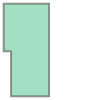

In [91]:
match_geometry(*v2, tree)

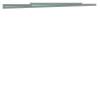

In [83]:
tree.geometries[3]